In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

data = pd.read_csv("G:/DACON/영화리뷰/train.csv")
data

,id,document,label
0,1,영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐,0
1,2,히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...,1
2,3,괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~,1
3,4,아무래도 20년도지난작품이라 지금보기는너무유치하다,0
4,5,지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.,0
...,...,...,...
4995,4996,좋은 배우들로 3류영화를 찍은 안타까운 영화,0
4996,4997,진짜 드럽게 재미없다 에드워드 호퍼 그림에 배경 빼고는 볼게 아닌영화,0
4997,4998,가장 실망스러운 영화.. 지금까지 본영화중..,0
4998,4999,"이런 평점 테러, 네이버에서 좀 막아야 하는 것 아닌가?",1


In [5]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은:{col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다.')
    return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   document  5000 non-null   object
 2   label     5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


In [7]:
val_count = data['label'].value_counts()
print('라벨 0인 리뷰 개수', val_count[0])
print('라벨 1인 리뷰 개수', val_count[1])

라벨 0인 리뷰 개수 2564
라벨 1인 리뷰 개수 2436


In [8]:
plt.style.use('ggplot')

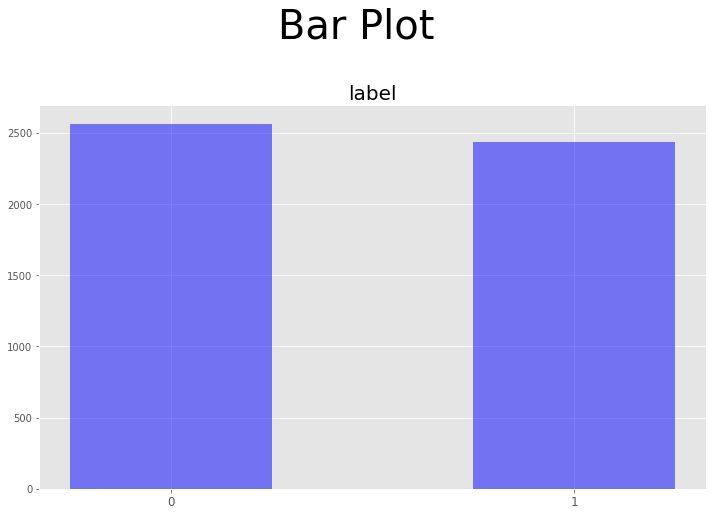

In [9]:
feature = data['label']

plt.figure(figsize = (10,7.5))
plt.suptitle('Bar Plot', fontsize = 40)
plt.title('label', fontsize = 20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width = 0.5, color = 'b', alpha = 0.5)
plt.xticks(temp.keys(),fontsize = 12)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [10]:
str_len_mean = np.mean(data['document'].str.len())
print('리뷰의 평균 길이:', str_len_mean)

리뷰의 평균 길이: 27.1352


In [11]:
mask_pos = (data.label == 1)
mask_neg = (data.label == 0)

df_train = data.document.copy()
df_pos = data.loc[mask_pos,:].document
df_neg = data.loc[mask_neg,:].document

compare = [df_train, df_pos, df_neg]

In [12]:
df_pos.head()

1            히치콕이 이 영화를 봤다면 분명 박수를 쳤을듯...
2    괜찮은 음악영화가 또 나왔군요!!! 따뜻한 겨울이 될 것 같아요~
5       내인생에 있어 손까락에 꼽히는 영화 원작을 능가한 리메이크작
7          마음이 성숙하고 보면 다르게 보이는 영화.. 걸작이다.
8                   가슴 찡했던, 오래 기억에남을 영화!!
Name: document, dtype: object

In [13]:
df_neg.head()

0                  영상이나 음악이 이쁘다 해도 미화시킨 불륜일뿐
3                아무래도 20년도지난작품이라 지금보기는너무유치하다
4    지금까지의 영화들이 그랬듯. 이 영화역시 일본에 대한 미화는 여전하다.
6                성룡영화중 최악 .. 차라리 러시아워가 훨씬 나음
9                   결말 기분나쁘다 공포매니아에게 이따위 결말을
Name: document, dtype: object

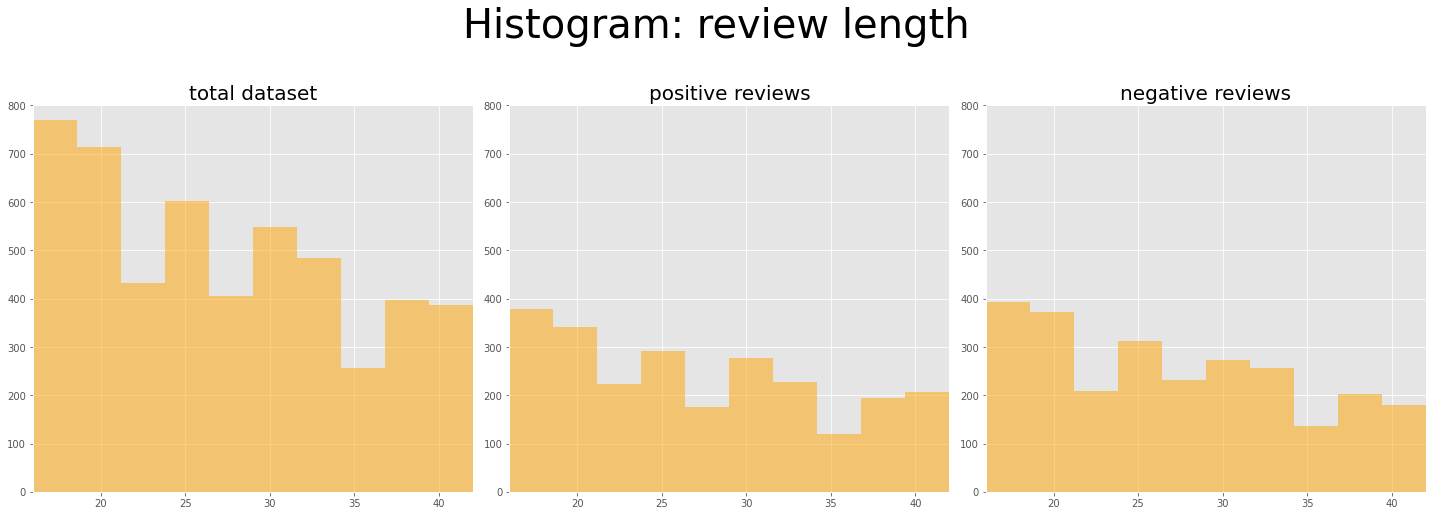

In [14]:
plt.figure(figsize=(20,7.5))
plt.suptitle('Histogram: review length', fontsize = 40)
name = ['total dataset', 'positive reviews', 'negative reviews']

for i in range(len(compare)):
    document = compare[i]
    string_len = [len(x) for x in document]
    plt.subplot(1,3,i+1)
    plt.title(name[i], fontsize = 20)
    plt.axis([16,42,0,800])
    plt.hist(string_len, alpha = 0.5, color = 'orange')
    
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

In [15]:
word_split = data['document'].str.split()
word_split[:5]

0                     [영상이나, 음악이, 이쁘다, 해도, 미화시킨, 불륜일뿐]
1                 [히치콕이, 이, 영화를, 봤다면, 분명, 박수를, 쳤을듯...]
2       [괜찮은, 음악영화가, 또, 나왔군요!!!, 따뜻한, 겨울이, 될, 것, 같아요~]
3                      [아무래도, 20년도지난작품이라, 지금보기는너무유치하다]
4    [지금까지의, 영화들이, 그랬듯., 이, 영화역시, 일본에, 대한, 미화는, 여전하다.]
Name: document, dtype: object

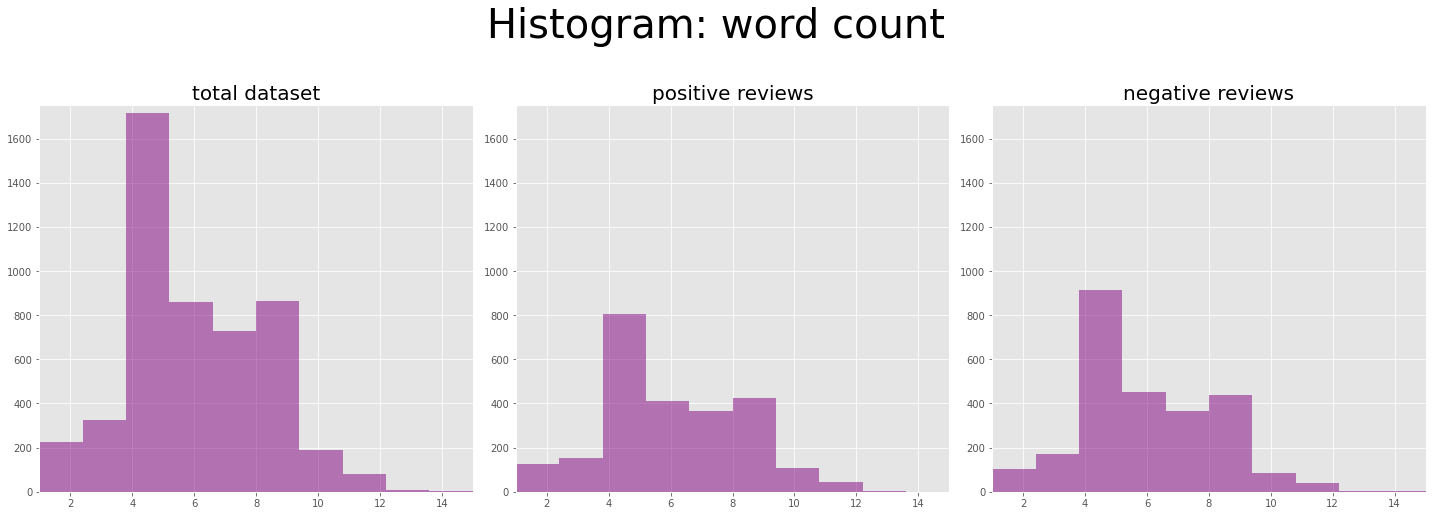

In [16]:
plt.figure(figsize=(20,7.5))
plt.suptitle('Histogram: word count', fontsize = 40)
name = ['total dataset', 'positive reviews', 'negative reviews']

for i in range(len(compare)):
    document = compare[i]
    split = document.str.split()
    split_len = [len(x) for x in split]
    plt.subplot(1,3,i+1)
    plt.title(name[i], fontsize=20)
    plt.axis([1,15,0,1750])
    plt.hist(split_len, alpha = 0.5, color='purple')
    
plt.tight_layout(rect = [0,0.03,1,0.95])
plt.show()

In [17]:
def df2str(df):
    s = [s for s in df]
    document = ''
    for i in range(len(s)):
        document += s[i]
    return document

def get_noun(text):
    okt = Okt()
    noun = okt.nouns(text)
    for i,v in enumerate(noun):
        if len(v) <2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common(100)
    
    return noun_list

def visualize(noun_list, title):
    wc = WordCloud(
        font_path = "C:/Users/user/anaconda3/pkgs/notebook-6.3.0-py38haa95532_0/Lib/site-packages/notebook/static/components/MathJax/jax/output/HTML-CSS/fonts/STIX-Web/NanumGothic.TTF",
        background_color = 'white',
        colormap = 'Dark2',
        width = 800,
        height = 800).generate_from_frequencies(dict(noun_list))
    
    plt.figure(figsize=(10,10))
    plt.suptitle('Word Cloud', fontsize = 40)
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation = 'lanczos')
    plt.axis('off')
    plt.show()
    
    return wc
#os.environ.get("C:/Windows/Fonts/NanumGothic.ttf")

In [18]:
document = df2str(df_train)
noun_list = get_noun(document)
noun_list[:5]

[('영화', 1501), ('정말', 320), ('진짜', 269), ('최고', 220), ('평점', 185)]

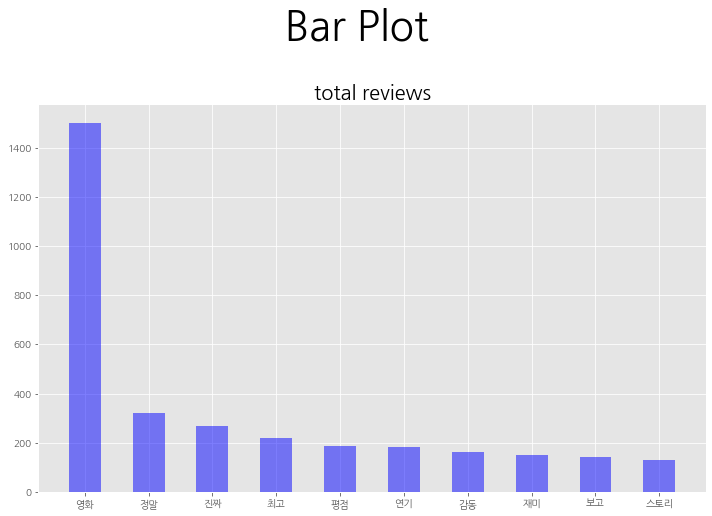

In [19]:
plt.rc('font', family = 'NanumGothic')
top_10 = dict(noun_list[:10])
plt.figure(figsize = (10,7.5))
plt.suptitle('Bar Plot', fontsize=40)
plt.title('total reviews', fontsize = 20)
plt.bar(top_10.keys(), top_10.values(), width = 0.5, color = 'b', alpha= 0.5)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

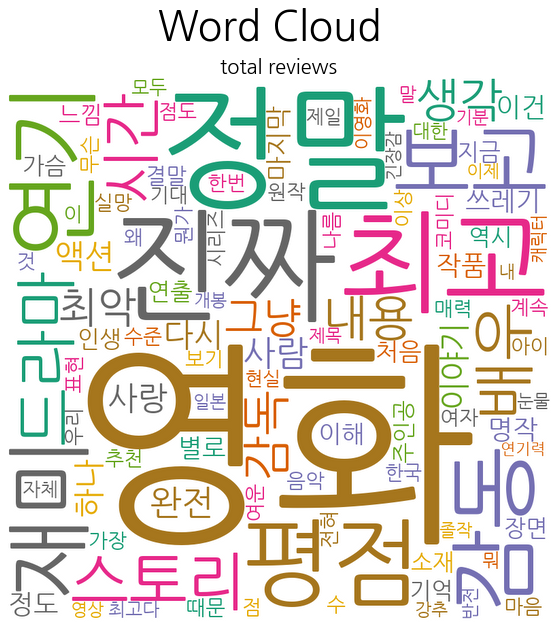

In [20]:
total_reviews = visualize(noun_list,'total reviews')

In [21]:
document_p = df2str(df_pos)
noun_list_p = get_noun(document_p)
noun_list_p[:20]

[('영화', 757),
 ('정말', 216),
 ('최고', 214),
 ('진짜', 136),
 ('감동', 134),
 ('연기', 108),
 ('드라마', 89),
 ('보고', 88),
 ('사랑', 72),
 ('다시', 70),
 ('평점', 67),
 ('생각', 65),
 ('명작', 60),
 ('배우', 58),
 ('사람', 55),
 ('완전', 54),
 ('마지막', 52),
 ('가슴', 51),
 ('이야기', 50),
 ('재미', 48)]

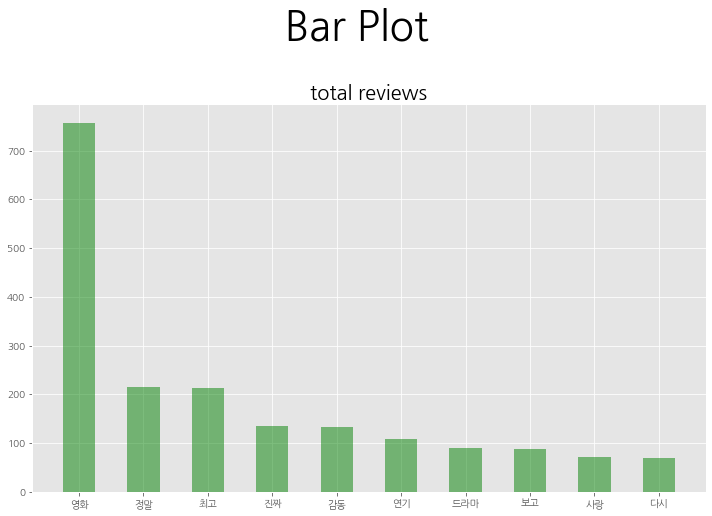

In [22]:
plt.rc('font', family = 'NanumGothic')
top_10 = dict(noun_list_p[:10])
plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize = 40)
plt.title('total reviews', fontsize = 20)
plt.bar(top_10.keys(),top_10.values(), width=0.5, color ='green', alpha = 0.5)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

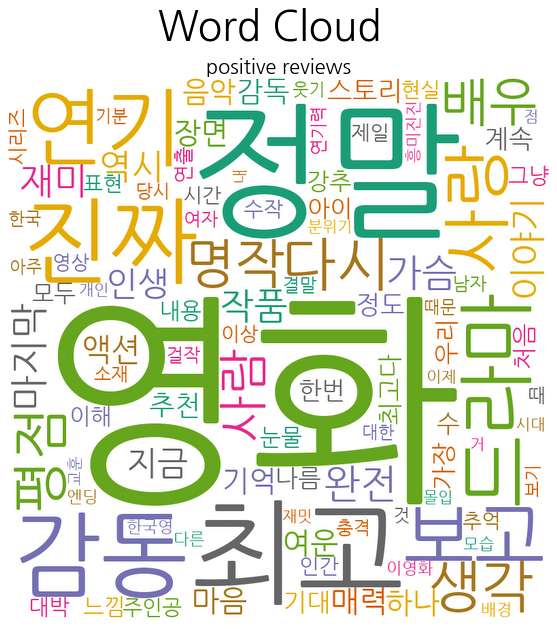

In [23]:
positive_reviews = visualize(noun_list_p, 'positive reviews')

In [24]:
document_n = df2str(df_neg)
noun_list_n = get_noun(document_n)
noun_list_n[:20]

[('영화', 746),
 ('진짜', 132),
 ('평점', 118),
 ('재미', 104),
 ('정말', 104),
 ('스토리', 102),
 ('최악', 98),
 ('시간', 97),
 ('내용', 85),
 ('감독', 78),
 ('그냥', 75),
 ('연기', 72),
 ('쓰레기', 70),
 ('배우', 69),
 ('이건', 55),
 ('별로', 53),
 ('보고', 52),
 ('액션', 43),
 ('하나', 41),
 ('사람', 41)]

In [25]:
print('부정 리뷰 Top10:', noun_list_n[:10])
print('긍정 리뷰 Top10:', noun_list_p[:10])

부정 리뷰 Top10: [('영화', 746), ('진짜', 132), ('평점', 118), ('재미', 104), ('정말', 104), ('스토리', 102), ('최악', 98), ('시간', 97), ('내용', 85), ('감독', 78)]
긍정 리뷰 Top10: [('영화', 757), ('정말', 216), ('최고', 214), ('진짜', 136), ('감동', 134), ('연기', 108), ('드라마', 89), ('보고', 88), ('사랑', 72), ('다시', 70)]


In [26]:
neg = list(dict(noun_list_n).keys())
pos = list(dict(noun_list_p).keys())

drop_words = [x for x in neg if x in pos]
print('공통 단어 \n', drop_words[:10])

공통 단어 
 ['영화', '진짜', '평점', '재미', '정말', '스토리', '시간', '내용', '감독', '그냥']


In [27]:
noun_list_n_filter = [x for x in noun_list_n if x[0] not in drop_words]
noun_list_p_filter = [x for x in noun_list_p if x[0] not in drop_words]

In [28]:
print('정제\n', noun_list_n_filter[:10])

정제
 [('최악', 98), ('쓰레기', 70), ('이건', 55), ('별로', 53), ('실망', 36), ('수준', 36), ('점도', 34), ('원작', 31), ('무슨', 31), ('코미디', 29)]


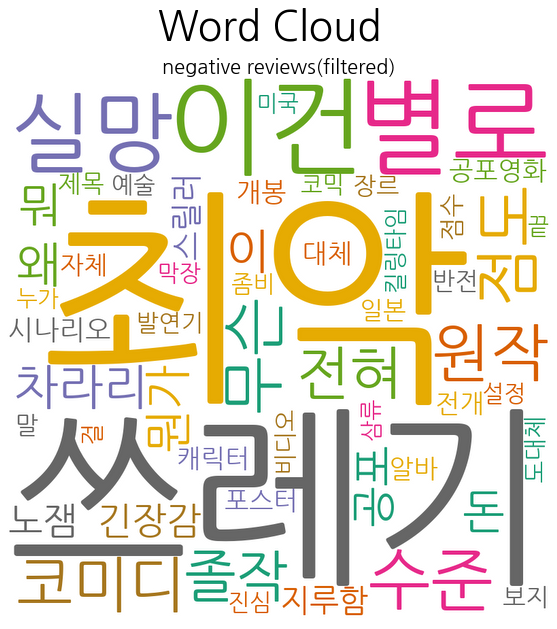

In [29]:
negative_reviews_filtered = visualize(noun_list_n_filter, 'negative reviews(filtered)')